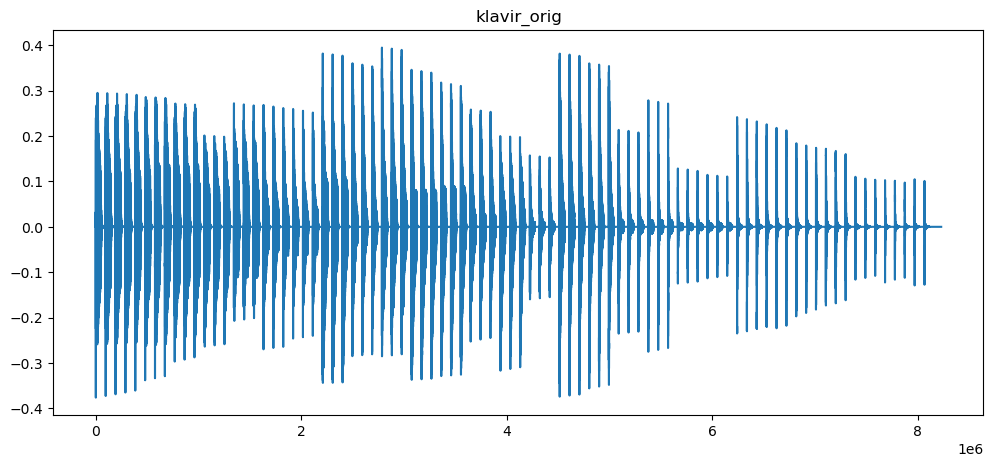

In [1]:
import numpy as np
import pylab as pl
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read("../audio/klavir.wav")

plt.figure(figsize=(12,5))
plt.title('klavir_orig')
plt.plot(s)
plt.show()
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)


xall = np.zeros((MIDITO+1, N)) # matrix with all tones - first signals empty,
# but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x

    DFT = np.fft.fft(x)


    samplefrom += Nwholetone
    sampleto += Nwholetone

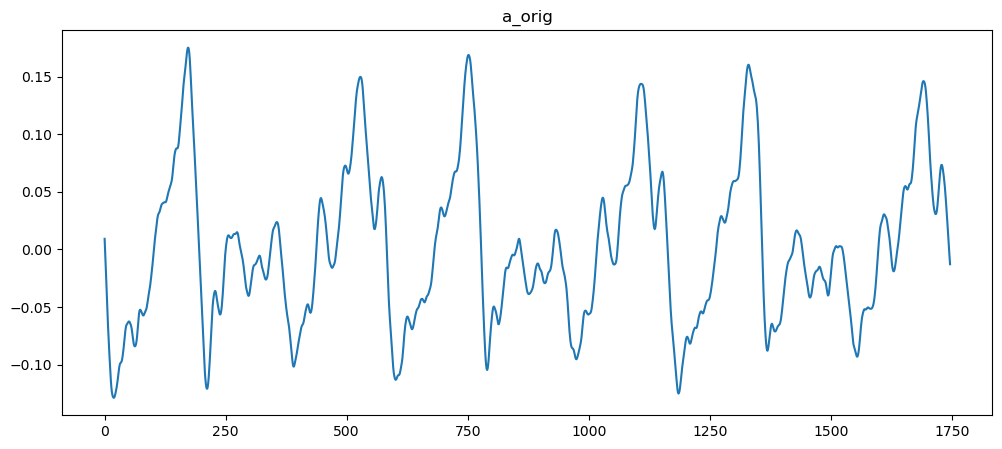

In [2]:
MIDI_A = 40
MIDI_A_F = 82.41
#MIDI A
plt.figure(figsize=(12,5))
plt.title('a_orig')
TONE_A = xall[MIDI_A]
sf.write('../audio/a_orig.wav', TONE_A, Fs)
plt.plot(TONE_A[0:int(3*Fs/MIDI_A_F)])
plt.show()
display(Audio(TONE_A, rate=Fs))

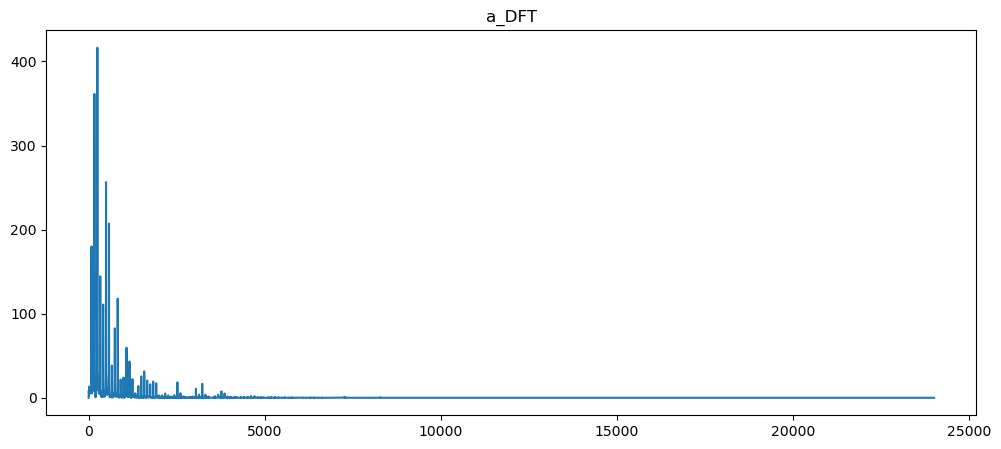

In [3]:
#MIDI A DFT
TONE_A_DFT = np.fft.fft(TONE_A)
TONE_A_DFT = np.abs(TONE_A_DFT)
TONE_A_DFT = TONE_A_DFT[:TONE_A_DFT.size//2]
F = np.arange(TONE_A_DFT.size) * Fs / TONE_A.size
plt.figure(figsize=(12,5))
plt.title('a_DFT')
plt.plot(F[0:], TONE_A_DFT[0:])
plt.show()

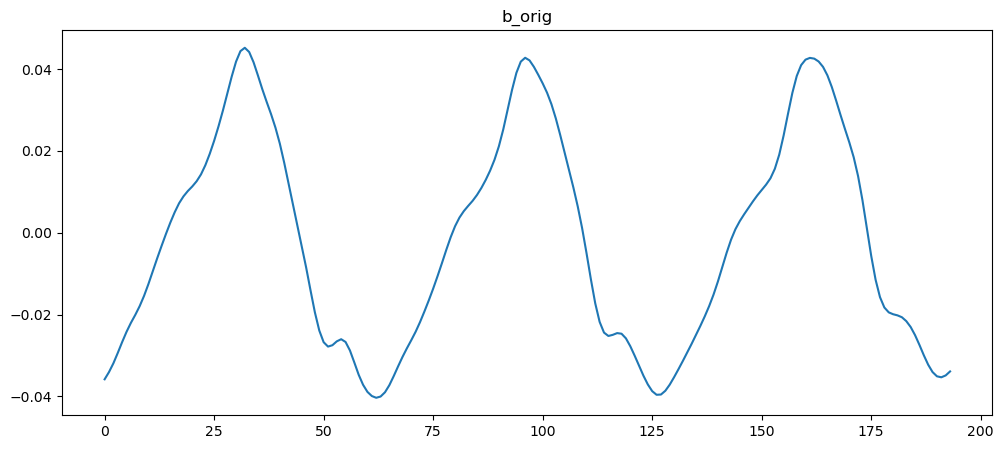

In [4]:
MIDI_B = 78
MIDI_B_F = 739.99
#MIDI B
plt.figure(figsize=(12,5))
plt.title('b_orig')
TONE_B = xall[MIDI_B]
sf.write('../audio/b_orig.wav', TONE_B, Fs)
plt.plot(TONE_B[0:int(3*Fs/MIDI_B_F)])
plt.show()
display(Audio(TONE_B, rate=Fs))

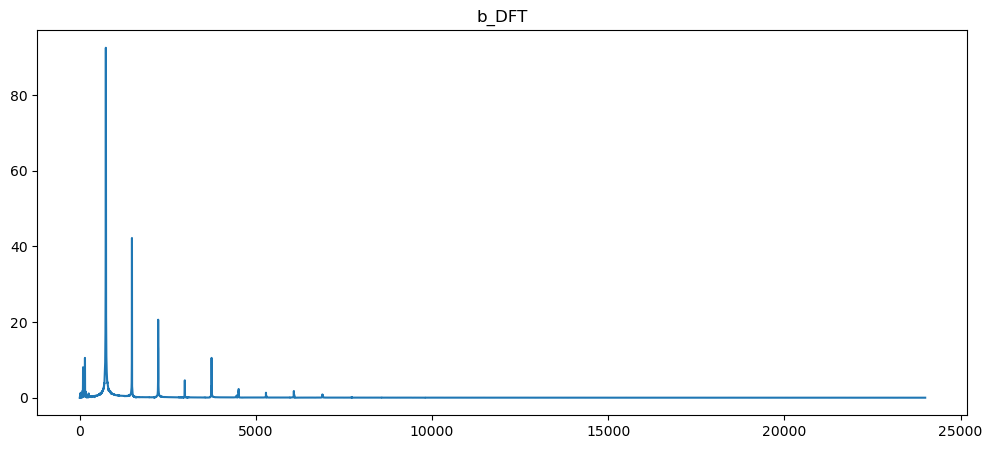

In [5]:
#MIDI B DFT
TONE_B_DFT = np.fft.fft(TONE_B)
TONE_B_DFT = np.abs(TONE_B_DFT)
TONE_B_DFT = TONE_B_DFT[:TONE_B_DFT.size//2]
F = np.arange(TONE_B_DFT.size) * Fs / TONE_B.size
plt.figure(figsize=(12,5))
plt.title('b_DFT')
plt.plot(F[0:], TONE_B_DFT[0:])
plt.show()

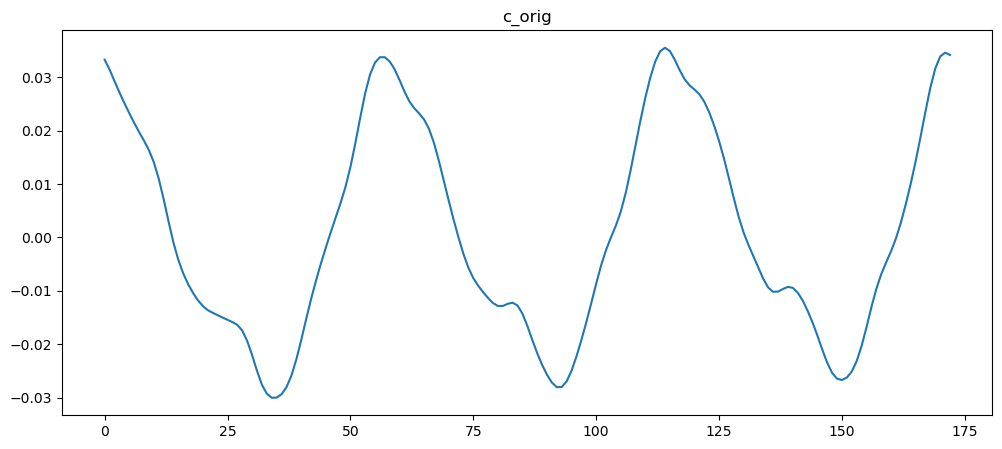

In [6]:
MIDI_C = 80
MIDI_C_F = 830.61
#MIDI C
plt.figure(figsize=(12,5))
plt.title('c_orig')
TONE_C = xall[MIDI_C]
sf.write('../audio/c_orig.wav', TONE_C, Fs)
plt.plot(TONE_C[0:int(3*Fs/MIDI_C_F)])
plt.show()
display(Audio(TONE_C, rate=Fs))

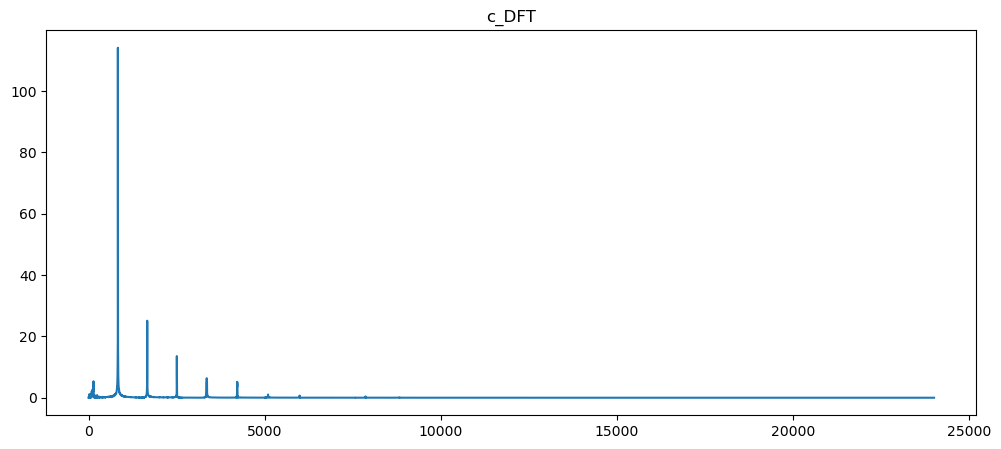

In [7]:
#MIDI C DFT
TONE_C_DFT = np.fft.fft(TONE_C)
TONE_C_DFT = np.abs(TONE_C_DFT)
TONE_C_DFT = TONE_C_DFT[:TONE_C_DFT.size//2]
F = np.arange(TONE_C_DFT.size) * Fs / TONE_C.size
plt.figure(figsize=(12,5))
plt.title('c_DFT')
plt.plot(F[0:], TONE_C_DFT[0:])
plt.show()

In [8]:
i = 24
f0_autocorr = np.zeros(MIDITO+1)
for TONE in xall[i:]:
    corr = np.correlate(TONE, TONE,"full")
    peak1 = scipy.signal.find_peaks(corr[corr.size//2:], max(corr[corr.size//2:])/1.75)[0][0]
    peak2 = scipy.signal.find_peaks(corr[corr.size//2:], max(corr[corr.size//2:])/1.75)[0][1]
    f0_autocorr[i] = 1/(peak2-peak1)*Fs;
    print("Fundamental freq. f0 of TONE on MIDI",i," is:", 1/(peak2-peak1)*Fs)

    i = i+1

Fundamental freq. f0 of TONE on MIDI 24  is: 32.76450511945392
Fundamental freq. f0 of TONE on MIDI 25  is: 34.73227206946454
Fundamental freq. f0 of TONE on MIDI 26  is: 36.7816091954023
Fundamental freq. f0 of TONE on MIDI 27  is: 38.961038961038966
Fundamental freq. f0 of TONE on MIDI 28  is: 41.2725709372313
Fundamental freq. f0 of TONE on MIDI 29  is: 43.71584699453552
Fundamental freq. f0 of TONE on MIDI 30  is: 46.33204633204633
Fundamental freq. f0 of TONE on MIDI 31  is: 49.079754601227
Fundamental freq. f0 of TONE on MIDI 32  is: 51.94805194805195
Fundamental freq. f0 of TONE on MIDI 33  is: 55.10907003444317
Fundamental freq. f0 of TONE on MIDI 34  is: 58.3232077764277
Fundamental freq. f0 of TONE on MIDI 35  is: 123.71134020618557
Fundamental freq. f0 of TONE on MIDI 36  is: 131.14754098360655
Fundamental freq. f0 of TONE on MIDI 37  is: 138.72832369942196
Fundamental freq. f0 of TONE on MIDI 38  is: 73.50689127105666
Fundamental freq. f0 of TONE on MIDI 39  is: 77.92207792

## DTFT

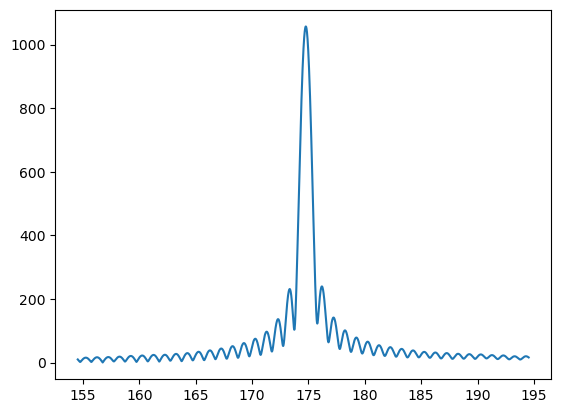

In [18]:
i = 53;

TONE = xall[i]
FREQRANGE = 20
f0_basic = f0_autocorr[i]

step = 0.01

n = np.arange(0, TONE.size)
A = np.zeros([int(FREQRANGE*2/step), TONE.size],dtype=complex)
j = 0
for k in np.arange(f0_basic-FREQRANGE, f0_basic+FREQRANGE, step):
    A[j,:] = np.exp(-1j * 2 * np.pi * k * (n/TONE.size))
    j+=1
Xdtft = np.matmul(A,TONE.T)

plt.plot(np.arange(f0_basic-FREQRANGE, f0_basic+FREQRANGE, step),np.abs(Xdtft))
plt.show()
